## Contents
#### 1. Importing libraries and data
#### 2. Data Wrangling
#### 3. The elbow technique
#### 4. K-means clustering
#### 5. Plot clusters
#### 6. Descriptive statistics

### 1. Importing libraries and data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
pd.options.display.max_columns = None

In [5]:
pd.options.display.max_rows = None

In [60]:
path = r'C:\Documents\Career Foundry\Immersion Final\Prison Comparisons\02 Data'

In [61]:
df = pd.read_csv(os.path.join(path, 'Prepped Data', 'CleanedRates.csv'))

### 2. Data wrangling

In [62]:
df.head()

,year,state,tot_imprisoned,tot_black_imprisoned,tot_white_imprisoned
0,1990,TX,886.62,6546.68,548.77
1,1990,MO,613.79,11277.66,532.95
2,1990,SC,979.19,1962.65,474.80
3,1990,GA,948.45,2828.87,473.16
4,1990,TN,602.90,4587.75,462.88


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1282 non-null   int64  
 1   state                 1282 non-null   object 
 2   tot_imprisoned        1282 non-null   float64
 3   tot_black_imprisoned  1282 non-null   float64
 4   tot_white_imprisoned  1282 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 50.2+ KB


In [13]:
df.shape

(1282, 4)

In [49]:
df.reset_index()

,year,state,tot_imprisoned,tot_black_imprisoned,tot_white_imprisoned
0,1990,TX,886.62,6546.68,548.77
1,1990,MO,613.79,11277.66,532.95
2,1990,SC,979.19,1962.65,474.80
3,1990,GA,948.45,2828.87,473.16
4,1990,TN,602.90,4587.75,462.88
5,1990,OK,559.80,3215.56,453.94
6,1990,KY,517.04,4618.81,452.39
7,1990,MI,538.58,15675.27,438.02
8,1990,OR,473.62,3209.47,436.22
9,1990,UT,478.60,27051.21,423.20


In [64]:
dfk = df[['year', 'tot_imprisoned', 'tot_black_imprisoned', 'tot_white_imprisoned']]

### 3. Elbow

In [66]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [67]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [68]:
score = [kmeans[i].fit(dfk).score(dfk) for i in range(len(kmeans))]

In [69]:
score

[-45062651141.953865,
 -20793024416.353024,
 -11052689453.416805,
 -6905933780.91515,
 -5042012611.548316,
 -3698771221.048597,
 -2666682083.162326,
 -1912017331.0521884,
 -1645415190.5681722]

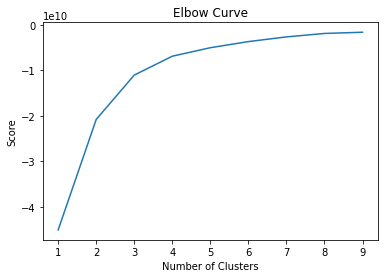

In [70]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. k-means clustering

In [71]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [72]:
# Fit the k-means object to the data.

kmeans.fit(dfk)

KMeans(n_clusters=3)

In [73]:
dfk['clusters'] = kmeans.fit_predict(dfk)

In [74]:
dfk.head(10)

,year,tot_imprisoned,tot_black_imprisoned,tot_white_imprisoned,clusters
0,1990,886.62,6546.68,548.77,0
1,1990,613.79,11277.66,532.95,1
2,1990,979.19,1962.65,474.80,0
3,1990,948.45,2828.87,473.16,0
4,1990,602.90,4587.75,462.88,0
5,1990,559.80,3215.56,453.94,0
6,1990,517.04,4618.81,452.39,0
7,1990,538.58,15675.27,438.02,1
8,1990,473.62,3209.47,436.22,0
9,1990,478.60,27051.21,423.20,2


In [75]:
dfk['clusters'].value_counts(dropna = False)

0    1025
1     237
2      20
Name: clusters, dtype: int64

### 5. Plot clusters

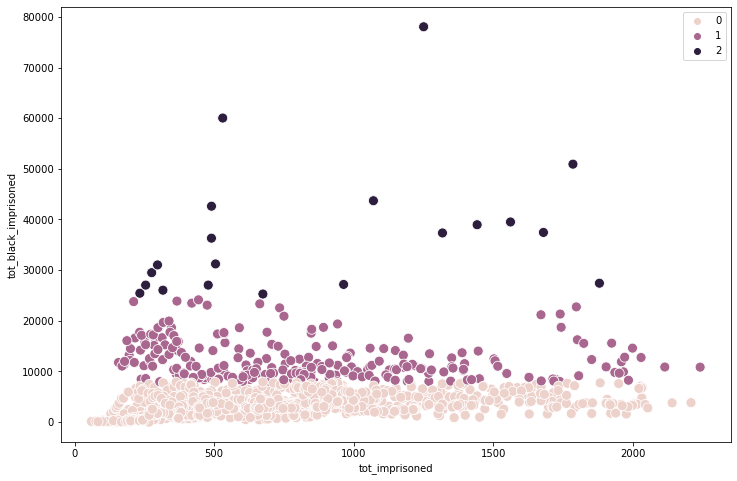

In [76]:
# Plot the clusters for the "tot_imprisoned" and "tot_black_imprisoned" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['tot_imprisoned'], y=dfk['tot_black_imprisoned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('tot_imprisoned') # Label x-axis.
plt.ylabel('tot_black_imprisoned') # Label y-axis.
plt.show()

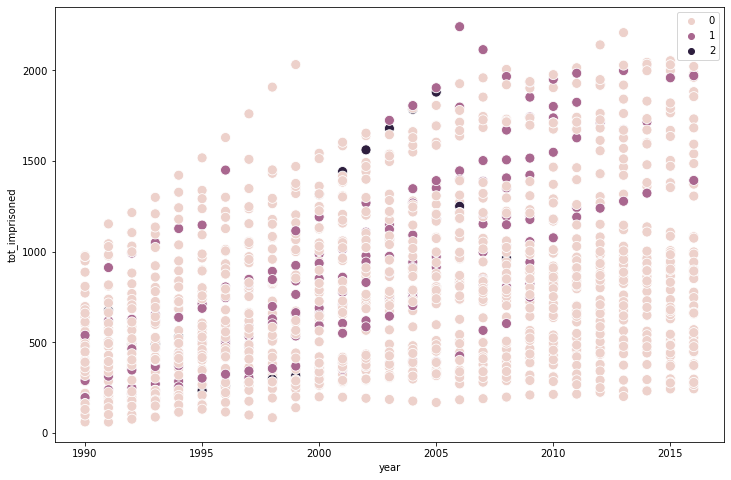

In [77]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['year'], y=dfk['tot_imprisoned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('tot_imprisoned') # Label y-axis.
plt.show()

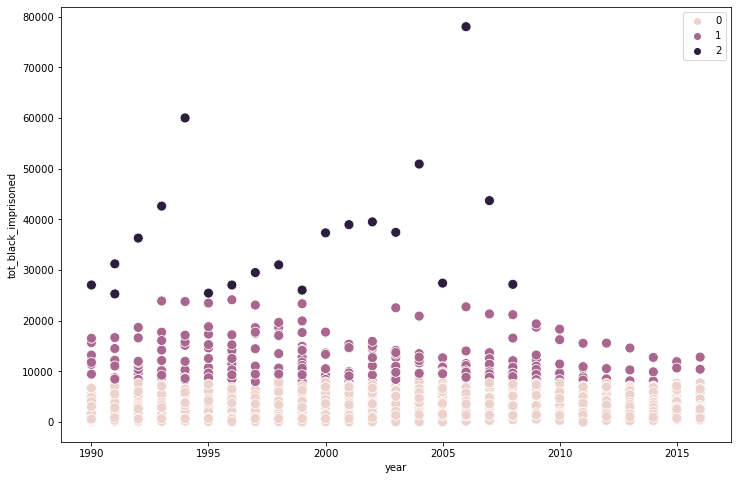

In [78]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['year'], y=dfk['tot_black_imprisoned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('tot_black_imprisoned') # Label y-axis.
plt.show()

### 6. Descriptive statistics

In [79]:
dfk.loc[dfk['clusters'] == 2, 'cluster'] = 'black'
dfk.loc[dfk['clusters'] == 1, 'cluster'] = 'medium purple'
dfk.loc[dfk['clusters'] == 0, 'cluster'] = 'light purple'

In [80]:
dfg = dfk.groupby('cluster').agg({
                         'tot_black_imprisoned':['mean','median'], 
                         'tot_imprisoned':['mean','median'],
                          'tot_white_imprisoned':['mean','median']})

In [81]:
dfg

tot_black_imprisoned           tot_imprisoned           \
                              mean    median           mean   median   
cluster                                                                
black                 37108.326000  33771.11     874.598000  602.385   
light purple           3669.578595   3647.92     793.449473  727.430   
medium purple         12213.048059  10982.97     849.158017  774.280   

              tot_white_imprisoned           
                              mean   median  
cluster                                      
black                   727.078500  455.245  
light purple            516.872585  429.520  
medium purple           681.694852  589.920

##### Compare just the medians and make the table easier to read

In [82]:
dfgR = dfg.round(0)

In [84]:
dfgR

tot_black_imprisoned          tot_imprisoned         \
                              mean   median           mean median   
cluster                                                             
black                      37108.0  33771.0          875.0  602.0   
light purple                3670.0   3648.0          793.0  727.0   
medium purple              12213.0  10983.0          849.0  774.0   

              tot_white_imprisoned         
                              mean median  
cluster                                    
black                        727.0  455.0  
light purple                 517.0  430.0  
medium purple                682.0  590.0

In [85]:
df2 = dfgR.iloc[[0,1,2],[1,3,5]]

#### Medians table

In [86]:
df2

,tot_black_imprisoned,tot_imprisoned,tot_white_imprisoned
,median,median,median
cluster,,,
black,33771.0,602.0,455.0
light purple,3648.0,727.0,430.0
medium purple,10983.0,774.0,590.0
